# Building Unimodal Text Modal

In [1]:
cd ..

/notebooks/MultimodalTweetsClassification


In [2]:
#ensuring that any edits to libraries you make are reloaded here automatically
#to ensuere charts or images displayed are shown in this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [3]:
#importing required modules
from exp.Required_Modules_And_Packages import *
from exp.Data_Reading_And_Preprocessing import *
from exp.Required_Integration_Functionalities_For_Transformer_To_Fastai import *
from exp.Required_Functionalities_To_Handal_Multimodal_Dataset import *
from exp.Multimodal_Model_With_Intermediate_Or_EmbraceNet_Fusion import *

In [4]:
path = Path('/notebooks/MultimodalTweetsClassification')
# path.ls()

In [5]:
path_img = path/'data_image'

In [6]:
# Uncomment the code if dataset and labels are in .tar.gz and .zip format respectively

# data = "CrisisMMD_v2.tar.gz"
# agreed_label = "crisismmd_datasplit_agreed_label.zip"
# untar_data_and_unzip_label(data,agreed_label)

In [7]:
#reading csv files and doing initial necessary processing
data_human_text,test_data_human_text = get_dataframe(*get_tsv_data_files('humanitarian_task_tsv_files'),path)

reading data and preprocessing it.....
done!!


In [8]:
print(f"shape of data: {data_human_text.shape}\n")
print(f"train set: {data_human_text['is_valid'].value_counts()[0]}")
print(f"valid set: {data_human_text['is_valid'].value_counts()[1]}")      
print("="*50)
print(f"shape of test data: {test_data_human_text.shape}\n")

shape of data: (7124, 10)

train set: 6126
valid set: 998
shape of test data: (955, 9)



In [9]:
data_human_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid
0,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False
1,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False
2,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False
3,california_wildfires,917815040962695168,917815040962695168_2,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False
4,california_wildfires,917828283047260161,917828283047260161_0,why california wildfires are worse in the fall,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,other_relevant_information,Positive,False


In [10]:
test_data_human_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image
0,hurricane_harvey,905952332923338752,905952332923338752_0,has great event tomorrow for both byu and utah...,data_image/hurricane_harvey/8_9_2017/905952332...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,Positive
1,mexico_earthquake,912022130396672000,912022130396672000_0,now also carlo surf band at pm pwyc mexicoeart...,data_image/mexico_earthquake/24_9_2017/9120221...,not_humanitarian,not_humanitarian,not_humanitarian,Positive
2,hurricane_maria,927758858776465408,927758858776465408_0,guaynabo resident efrain diaz stands by bridge...,data_image/hurricane_maria/7_11_2017/927758858...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive
3,hurricane_harvey,907654309587779584,907654309587779584_0,after harvey irma leaves its own trail of dest...,data_image/hurricane_harvey/12_9_2017/90765430...,other_relevant_information,other_relevant_information,other_relevant_information,Positive
4,hurricane_maria,913745586104528898,913745586104528898_0,dawn just won and we re gonna match the amount...,data_image/hurricane_maria/29_9_2017/913745586...,not_humanitarian,not_humanitarian,not_humanitarian,Positive


In [11]:
# preparing data for language model to get encoder and word embedding vocab for text classification model
data_lm = get_text_data_for_language_model(data_human_text,path)

In [12]:
data_lm

TextLMDataBunch;

Train: LabelList (6126 items)
x: LMTextList
xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via,xxbos why california wildfires are worse in the fall
y: LMLabelList
,,,,
Path: /notebooks/MultimodalTweetsClassification;

Valid: LabelList (998 items)
x: LMTextList
xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos hurricane irma on twitter,xxbos feel xxunk by xxunk in so many levels how xxunk can picture xxunk me so bad on the floor while preparing for,xxbos postirma can xxunk so true,xxbos hurricane maria remains severe threat sept utc
y: LMLabelList
,,,,
Path: /notebooks/MultimodalTweetsClassification;

Test: None

In [13]:
# showing the data with corresponding annotations
data_lm.show_batch()

idx,text
0,with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos xxunk fire tubbsfire xxunk xxunk xxunk fire california napa
1,in kalutura district today situation lka srilanka xxbos veyangalla village heavily affected by recent floodsl in kalutura district today situation lka srilanka xxbos chinese cargo plane delivers relief to floodhit srilanka xxbos chinese cargo plane delivers relief to floodhit srilanka xxbos xxunk xxunk mora xxunk xxunk and warning xxunk xxunk xxbos xxunk xxunk mora xxunk xxunk and warning xxunk xxunk xxbos xxunk xxunk xxunk over relief to those affected by
2,xxbos sadrith mora xxunk xxunk morrowind eso ps xxbos tried this place out today in finnieston mora enjoyed it xxbos tried this place out today in finnieston mora enjoyed it xxbos tried this place out today in finnieston mora enjoyed it xxbos tried this place out today in finnieston mora enjoyed it xxbos xxunk xxunk xxunk xxunk xxunk xxunk xxunk mora xxbos xxunk xxunk xxunk xxunk xxunk xxunk xxunk mora
3,those lost in mexico tragic earthquake fuerzamexico xxbos the lagalaxy donned black armbands during atlvla to honor those lost in mexico tragic earthquake fuerzamexico xxbos xxunk xxunk factory pray for the earthquake in mexico f f f xxbos xxunk xxunk factory pray for the earthquake in mexico f f f xxbos volunteers propel mexico city earthquake response xxbos volunteers propel mexico city earthquake response xxbos volunteers propel mexico city earthquake
4,iraq xxbos turkish red crescent cooperates with iraqi red crescent in order to alleviate needs of earthquake victims in iraq xxbos president dr xxunk xxunk in xxunk district of iraq which suffered the most from the earthquake xxbos hundred earthquake victim families in khanaqin city of iraq were received food support today xxbos hundred earthquake victim families in khanaqin city of iraq were received food support today xxbos hundred earthquake


In [14]:
# importing pretrained AWD_LSTM model and making learner object consist of data,model for training
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [17]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


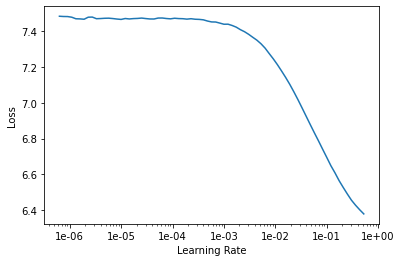

In [18]:
learn_lm.recorder.plot(skip_end=15)

In [19]:
learn_lm.fit_one_cycle(2,3e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.026642,4.721391,0.224256,00:02
1,5.081584,4.621178,0.233482,00:02


In [20]:
learn_lm.unfreeze()

In [21]:
learn_lm.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.956048,4.634493,0.249405,00:02


In [22]:
# saving encoder for using it in classification model
learn_lm.save_encoder('fine_tuned_enc_human')

In [23]:
# preprocessing and creating databunch object for data(train and dev split) and test data(test split)
data_clas = get_text_data(data_human_text,path,vocab=data_lm.vocab)
test_data_clas = get_test_text_data(test_data_human_text,path,vocab=data_lm.vocab)

In [24]:
# making single databunch object of data and test data
data_clas.add_test(test_data_clas.train_ds)
data_clas.test_ds.y = test_data_clas.train_ds.y

In [25]:
data_clas

TextClasDataBunch;

Train: LabelList (6126 items)
x: TextList
xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via,xxbos why california wildfires are worse in the fall
y: CategoryList
infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,other_relevant_information
Path: /notebooks/MultimodalTweetsClassification;

Valid: LabelList (998 items)
x: TextList
xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos hurricane irma on twitter,xxbos feel xxunk by xxunk in so many levels how xxunk can picture xxunk me so bad on the floor while preparing for,xxbos postirma can xxunk so true,xxbos hurricane maria remains severe threat sept utc
y: CategoryList
not_humanitarian,other_relevant_information,

In [26]:
# showing data with labels
data_clas.show_batch()

text,target
xxbos ya ll be sure to get in on this week xxunk ve got to know what you think you know in case need to know,not_humanitarian
xxbos to xxunk time lost to irma amp so we can raise as much money for xxunk xxunk as we like to we ll be raising,not_humanitarian
xxbos if all were wondering how long it would take florida to get back to be being florida in the wake of irma here is,not_humanitarian
xxbos all eyes on maria as it heads over simliar islands that got hit with irma sending fto them as we watch it closely,other_relevant_information
xxbos we did the mickey not so scary halloween at magic kingdom last night it was fun after irma we needed to do so,not_humanitarian


In [27]:
# importing pretrained AWD-LSTM model and making learner object consist of data,model,metrics and callbacks for training

learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,metrics=[accuracy,Precision1(average='macro'),
                Precision1(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=3),
               partial(ReduceLROnPlateauCallback,monitor='accuracy', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)]
            )

In [28]:
# laoding encoder for classification
learn_clas.load_encoder('fine_tuned_enc_human')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6126 items)
x: TextList
xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via,xxbos why california wildfires are worse in the fall
y: CategoryList
infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,other_relevant_information
Path: /notebooks/MultimodalTweetsClassification;

Valid: LabelList (998 items)
x: TextList
xxbos family xxunk finds dog they lost when escaping california wildfires,xxbos hurricane irma on twitter,xxbos feel xxunk by xxunk in so many levels how xxunk can picture xxunk me so bad on the floor while preparing for,xxbos postirma can xxunk so true,xxbos hurricane maria remains severe threat sept utc
y: CategoryList
not_humanitarian,other_relev

In [29]:
learn_clas.lr_find()

In [30]:
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.962246,0.822102,0.727455,0.550586,0.716607,0.484874,0.727455,0.508784,0.712429,00:03
1,0.744848,0.712413,0.732465,0.561815,0.731764,0.517754,0.732465,0.530027,0.718310,00:03
2,0.659805,0.689490,0.737475,0.777977,0.740961,0.528848,0.737475,0.572495,0.724132,00:03


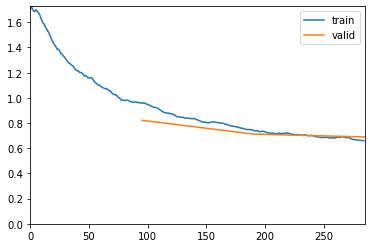

Better model found at epoch 0 with accuracy value: 0.7274549007415771.
Better model found at epoch 1 with accuracy value: 0.7324649095535278.
Better model found at epoch 2 with accuracy value: 0.7374749779701233.


In [31]:
# training the model's top layer's keeping keep other layer's in freezing mode, all the metrics shown here, have been
# evaluted on validation set
learn_clas.fit_one_cycle(3,5e-3,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.685285,0.661703,0.744489,0.782669,0.744868,0.544183,0.744489,0.585520,0.733781,00:03


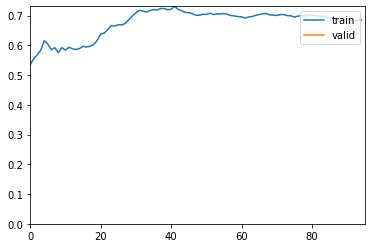

Better model found at epoch 0 with accuracy value: 0.7444889545440674.


In [32]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.580528,0.612189,0.762525,0.691470,0.757581,0.581180,0.762525,0.609532,0.757251,00:03


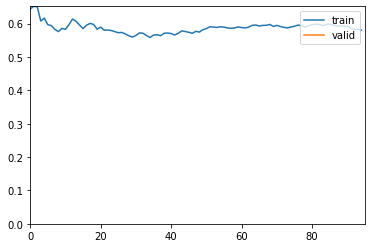

Better model found at epoch 0 with accuracy value: 0.7625250220298767.


In [33]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.493768,0.606452,0.764529,0.688038,0.759572,0.587897,0.764529,0.612089,0.759873,00:04
1,0.472502,0.597416,0.770541,0.709380,0.766970,0.581227,0.770541,0.616378,0.763290,00:04
2,0.436815,0.595952,0.768537,0.703564,0.765130,0.582269,0.768537,0.614632,0.761452,00:04
3,0.403317,0.600674,0.776553,0.802358,0.776496,0.630460,0.776553,0.665515,0.772657,00:04
4,0.369822,0.607058,0.778557,0.809601,0.778705,0.619540,0.778557,0.662406,0.773042,00:04
5,0.332982,0.612443,0.782565,0.815110,0.782785,0.599440,0.782565,0.633654,0.776722,00:04


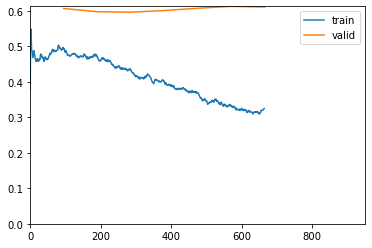

Better model found at epoch 0 with accuracy value: 0.7645290493965149.
Better model found at epoch 1 with accuracy value: 0.7705410718917847.
Better model found at epoch 3 with accuracy value: 0.7765530943870544.
Epoch 3: reducing lr to 0.00019009692640269474
Better model found at epoch 4 with accuracy value: 0.7785571217536926.
Epoch 4: reducing lr to 0.00016234913078995263
Better model found at epoch 5 with accuracy value: 0.7825651168823242.
Epoch 5: reducing lr to 0.00012225240438725783
Epoch 6: early stopping
Better model found at epoch 6 with accuracy value: 0.7845691442489624.
Epoch 6: reducing lr to 7.774839561274215e-05


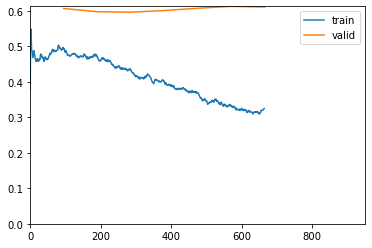

In [34]:

learn_clas.unfreeze()
learn_clas.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [45]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_clas)

/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai/train.py:213: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


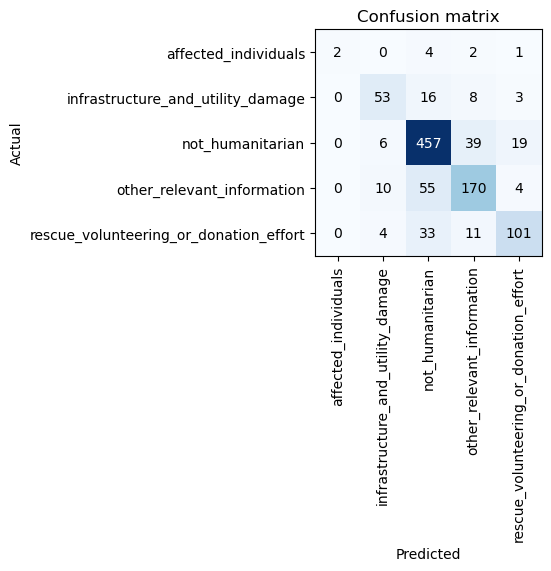

In [46]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [37]:
#making predictions on dev set to use it for classification report
preds,y,losses = learn_clas.get_preds(ds_type = DatasetType.Valid,with_loss=True)

In [38]:
y_preds = preds.argmax(1)

In [39]:
target_names = ['affected_individuals',
 'infrastructure_and_utility_damage',
 'not_humanitarian',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort']

In [40]:
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       1.00      0.22      0.36         9
     infrastructure_and_utility_damage       0.73      0.66      0.69        80
                      not_humanitarian       0.81      0.88      0.84       521
            other_relevant_information       0.74      0.71      0.72       239
rescue_volunteering_or_donation_effort       0.79      0.68      0.73       149

                              accuracy                           0.78       998
                             macro avg       0.81      0.63      0.67       998
                          weighted avg       0.78      0.78      0.78       998



In [41]:
learn_clas.validate(data_clas.test_dl,metrics=[accuracy,Precision1(average='macro'),Precision1(average='weighted'),
                                                           Recall(average='macro'),Recall(average='weighted'),
                                                           FBeta(average='macro',beta=1),FBeta(average='weighted',beta=1)])

[0.7028509,
 tensor(0.7487),
 tensor(0.6330),
 tensor(0.7445),
 tensor(0.5824),
 tensor(0.7487),
 tensor(0.6007),
 tensor(0.7453)]

In [42]:
#making predictions on test set to use it for classification report
preds,y,losses = learn_clas.get_preds(ds_type = DatasetType.Test,with_loss=True)
y_preds = preds.argmax(1)
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       1.00      0.11      0.20         9
     infrastructure_and_utility_damage       0.74      0.60      0.67        81
                      not_humanitarian       0.76      0.88      0.82       504
            other_relevant_information       0.78      0.62      0.69       235
rescue_volunteering_or_donation_effort       0.70      0.63      0.67       126

                              accuracy                           0.75       955
                             macro avg       0.80      0.57      0.61       955
                          weighted avg       0.76      0.75      0.75       955



/opt/conda/envs/fastai/lib/python3.7/site-packages/fastai/train.py:213: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


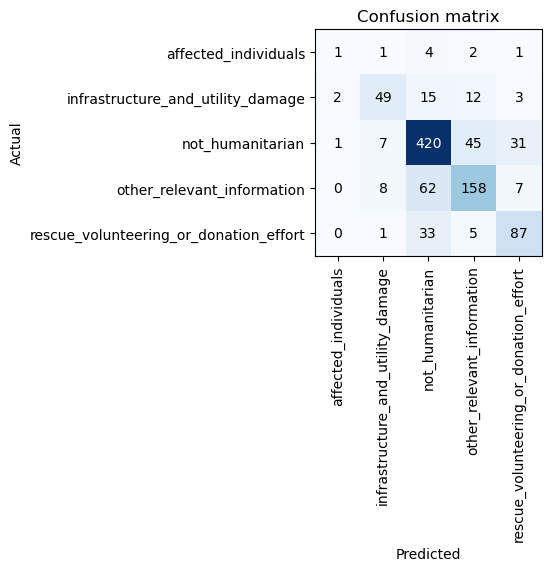

In [49]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_clas,ds_type=DatasetType.Test)
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [44]:
learn_clas.save("Humanitarian_text_only")